In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [4]:
df.isnull().sum() # df not having any null value

Brain    0
Body     0
dtype: int64

In [13]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [5]:
df.isna().sum() # df not habing any NA value

Brain    0
Body     0
dtype: int64

In [6]:
df = df.drop_duplicates() # Trying to remove duplicates

In [8]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [9]:
df.corr() # brain and body are correlated with 0.93.

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [12]:
# checking the outliers
iqr = df.quantile(0.75) - df.quantile(0.25)
lower_boundary = iqr - df.quantile(0.25)
upper_boundary = iqr + df.quantile(0.75)
lower_boundary
upper_boundary

Brain     95.805
Body     327.750
dtype: float64

Text(0, 0.5, 'Body')

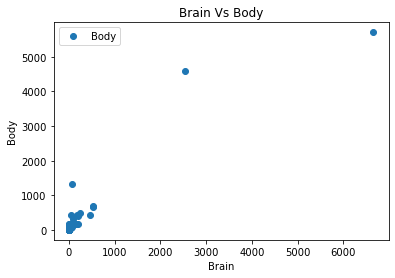

In [4]:
df.plot(x= 'Brain', y ='Body',style='o')
plt.title("Brain Vs Body")
plt.xlabel("Brain")
plt.ylabel("Body")

In [5]:
# Data\
X = df.loc[:,['Brain']].values
y = df.loc[:,'Body'].values
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr.coef_

array([0.85274603])

In [26]:
lr.intercept_

45.21711532031193

In [ ]:
# y = m*(0.85274603) + 45.21711532031193

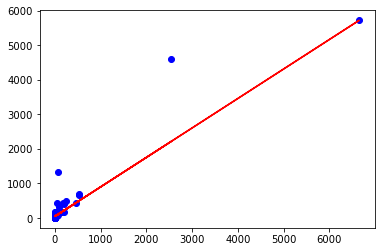

In [10]:
plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color = 'red')

In [11]:
y_pred = lr.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([  48.20172642,   46.36832246,   75.06322635,  496.31976483,
         98.08736914,  489.49779659,  117.70052781,   45.85667484,
         48.67073674,   45.22137905,  130.49171825, 2217.16125198,
         46.66678357,  204.7658974 ,   48.28700103,   45.32115034,
         45.30324267,  258.40362265,   46.06986135])

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df

,Actual,Predict
0,10.80,48.201726
1,8.10,46.368322
2,56.00,75.063226
3,680.00,496.319765
4,1320.00,98.087369
5,655.00,489.497797
6,325.00,117.700528
7,12.30,45.856675
8,17.00,48.670737
9,0.14,45.221379


In [12]:
from sklearn import metrics
y_pred = lr.predict(X_test) 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.6352705883696131


In [ ]:
# R2 score is 0.6352705883696131 so the model maybe cosider(Note: R2 score 0.8 and above is preferable)